# Tâche 8 : Structure de bande du BaLiP

Dans cette tâche numéro 8, nous allons analyser la structure de bande du BaLiP. Plus précisement, nous allons déterminer la bande interdite, la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion. De plus nous allons calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

In [226]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [227]:
with MPRester("mxlrouyFDIMHNAE4") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-10615")

## Structure de bande électronique

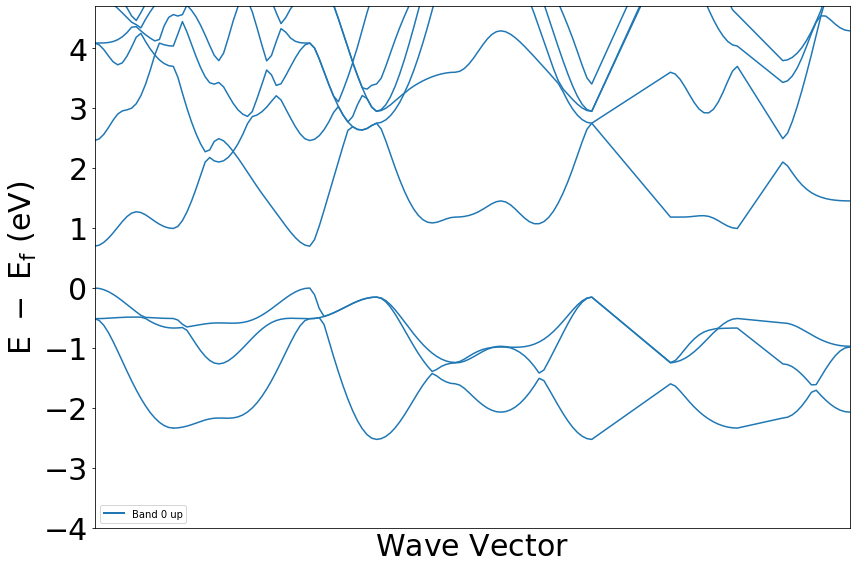

In [228]:
bsplotter = BSPlotter(bandstructure)
bsplotter.show()

## Bande interdite

In [229]:
print(bandstructure.get_band_gap())

{'direct': True, 'energy': 0.6981999999999999, 'transition': '(0.000,0.000,0.000)-(0.000,0.000,0.000)'}


L'énergie de la bande interdite est de 0.6982 eV. Le matériau est donc un semi-conducteur.

## Dispertion minimale et maximale

In [230]:
data = bsplotter.bs_plot_data()
distances = data.get('distances')
energy = data.get('energy')

In [231]:
valence = bandstructure.get_vbm()
conduction = bandstructure.get_cbm()
print("Dernière bande de valence : " + str(valence.get("band_index")))
print("Première bande de conduction : " + str(conduction.get("band_index")))

Dernière bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [8]})
Première bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [9]})


### Dispertion dans la dernière bande de valence

In [239]:
diffmax=0
diffmin=1
for i in range(len(distances)):
    diff = abs(energy["1"][i][8][0]-energy["1"][i][8][-1])
    if diffmax<diff:
        diffmax=diff
        imax=i
    if diffmin>diff:
        diffmin=diff
        imin=i
print("Chemin avec la plus grande dispersion : ",imax+1)
print("La différence d'énergie est de : ",diffmax,"eV")
print("Chemin avec la plus petite dispersion : ",imin+1)
print("La différence d'énergie est de : ",diffmin,"eV")

Chemin avec la plus grande dispersion :  1
La différence d'énergie est de :  0.9718 eV
Chemin avec la plus petite dispersion :  1
La différence d'énergie est de :  0.9718 eV


### Dispertion dans la première bande de conduction

In [237]:
diffmax=0
diffmin=1
for i in range(len(distances)):
    diff = abs(energy["1"][i][9][0]-energy["1"][i][9][-1])
    if diffmax<diff:
        diffmax=diff
        imax=i
    if diffmin>diff:
        diffmin=diff
        imin=i
print("Chemin avec la plus grande dispersion : ",imax+1)
print("La différence d'énergie est de : ",diffmax,"eV")
print("Chemin avec la plus petite dispersion : ",imin+1)
print("La différence d'énergie est de : ",diffmin,"eV")

Chemin avec la plus grande dispersion :  1
La différence d'énergie est de :  0.7549000000000001 eV
Chemin avec la plus petite dispersion :  1
La différence d'énergie est de :  0.7549000000000001 eV


![](notebook.png)

## Masse effective

En toute généralité, la masse effective est définie par le tenseur d'ordre 2 des dérivées secondes de l’énergie E par rapport au vecteur d’onde k.


$m^* = \frac{\overline{h}^2}{\frac{d^2\epsilon}{d^2k}}$ 


avec l'hypothèse d'une dispersion parabolique, $E(k) = ak^2 + bk + c$, où $a, b, c$ sont à déterminer.

In [234]:
hbar_2 = ((6.62607004*10**(-34))/(2*np.pi))**2
ev = 1.602176634*10**(-19)
angstrom = 10**(-10)

In [235]:
k = np.zeros(3)
eps = np.zeros(3)
(k[1],eps[1]) = data.get('vbm')[0]
(k[0],eps[0]) = (distances[0][-2],energy["1"][0][8][-2])
(k[2],eps[2]) = (distances[0][1],energy["1"][0][8][1])
a = np.polyfit(k,eps,2)

print("𝜖(k) = "+str(a[0])+" k\u00b2 + "+str(a[1])+" k "+str(a[2]))
print("Masse effective : ",str(hbar_2/(2*a[0]*ev*(angstrom)**2))+" kg")

𝜖(k) = 0.002995005652089527 k² + -0.14765855154307866 k -6.409875621278547e-17
Masse effective :  1.1588154371381319e-27 kg


In [236]:
k = np.zeros(3)
eps = np.zeros(3)
(k[1],eps[1]) = data.get('vbm')[0]
(k[0],eps[0]) = (distances[0][-2],energy["1"][0][9][-2])
(k[2],eps[2]) = (distances[0][1],energy["1"][0][9][1])
a = np.polyfit(k,eps,2)

#affichage des résultats
print("𝜖(k) = "+str(a[0])+" k\u00b2 + "+str(a[1])+" k +"+str(a[2]))
print("Masse effective : ",str(hbar_2/(2*a[0]*ev*(angstrom)**2))+" kg")

𝜖(k) = -1.893516118321515 k² + 14.944382261018093 k +1.230696119285481e-14
Masse effective :  -1.832917475787756e-30 kg
